# [NetworkX](https://networkx.org/documentation/stable/reference/index.html) básico
Las clases se nombran usando CamelCase (mayúsculas al inicio de cada palabra).

Las funciones, los métodos y los nombres de variables se escriben en lower_case_underscore (minúsculas con un guión bajo representando un espacio entre palabras).

In [ ]:
import networkx as nx

## Tipos de gráficas

Tipos de Grafos en NetworkX

| Clase          | Tipo        | Bucles permitidos | Aristas paralelas permitidas |
|----------------|-------------|-------------------|-----------------------------|
| `Graph`        | No dirigido | Sí                | No                          |
| `DiGraph`      | Dirigido    | Sí                | No                          |
| `MultiGraph`   | No dirigido | Sí                | Sí                          |
| `MultiDiGraph` | Dirigido    | Sí                | Sí                          |

Explicación de términos:
- **Bucle (Self-loop)**: Una arista que conecta un nodo consigo mismo.
- **Aristas paralelas**: Múltiples aristas conectando el mismo par de nodos.

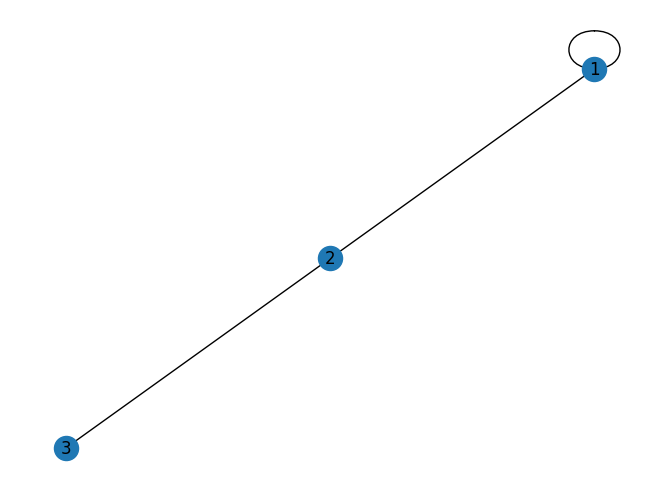

In [ ]:
#Graph
import networkx as nx

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 1)

nx.draw(G, with_labels=True)

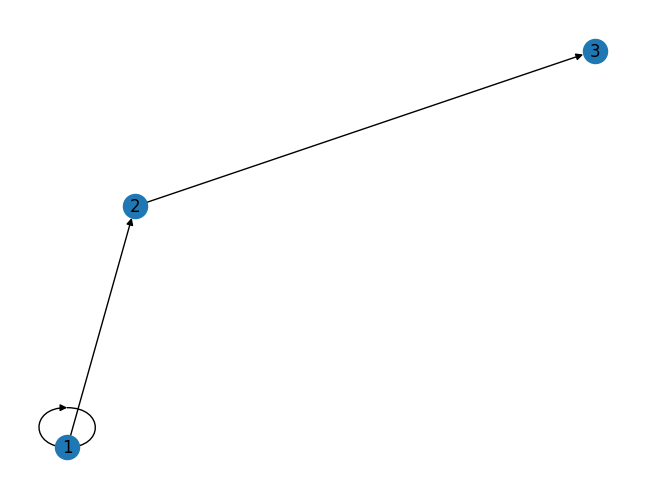

In [ ]:
#Digraph
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 1)

nx.draw(G, with_labels=True)

Aristas en MultiGraph: [(1, 2, 0), (1, 2, 1), (2, 2, 0)]


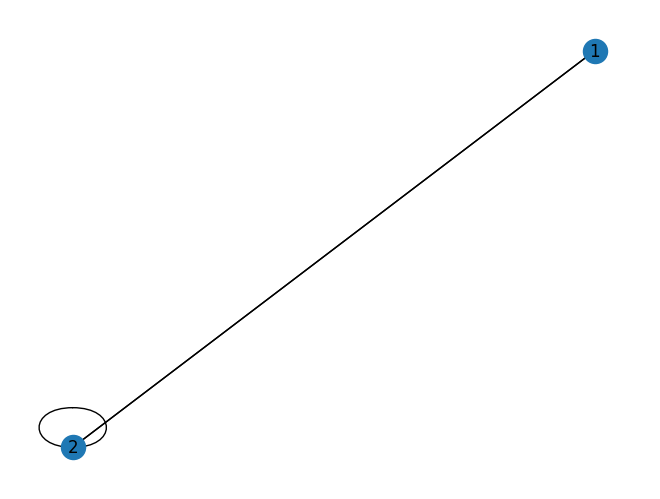

In [ ]:
#Multigraph
MG = nx.MultiGraph()
MG.add_edge(1, 2)
MG.add_edge(1, 2, weight=0.5, color="red")
MG.add_edge(2, 2)

print("Aristas en MultiGraph:", MG.edges(keys=True))
nx.draw(MG, with_labels=True)

Aristas en MultiDiGraph: [('X', 'Y', 0), ('X', 'Y', 1), ('Y', 'Y', 0)]


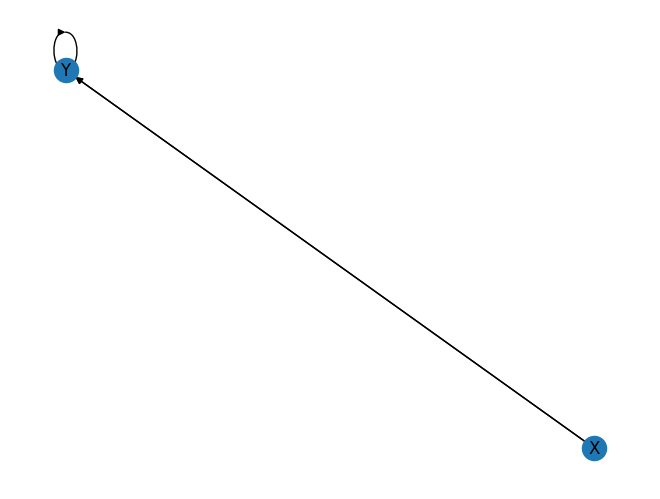

In [ ]:
#Multidigraph
MDG = nx.MultiDiGraph()
MDG.add_edge("X", "Y")                # arista dirigida
MDG.add_edge("X", "Y", frecuency="2") # arista paralela
MDG.add_edge("Y", "Y")                # bucle

print("Aristas en MultiDiGraph:", MDG.edges(keys=True))
nx.draw(MDG, with_labels=True)

## [Vistas](https://networkx.org/documentation/stable/reference/classes/index.html#module-networkx.classes.graphviews)
Ver redes con modificaciones temporales

In [ ]:
#subgraph_view: muestra menos nodos sin eliminarlos de verdad

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

# Vista que filtra nodos y aristas
H = nx.subgraph_view(
    G,
    filter_node=lambda n: n != 3,               #Condicion de filtrado en nodos
    filter_edge=lambda u, v: u != 1 and v != 1  #Condicion de filtrado en aristas
)

print("Nodos en G:", G.nodes())
print("Aristas en G:", G.edges(),"\n")
print("Nodos en H (vista):", H.nodes())
print("Aristas en H (vista):", H.edges())

Nodos en G: [1, 2, 3, 4]
Aristas en G: [(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)] 

Nodos en H (vista): [1, 2, 4]
Aristas en H (vista): [(2, 4)]


In [ ]:
#reverse_view: muestra las direcciones de las aristas invertidas
  #solo sirve en dirigidas

DG = nx.DiGraph()
DG.add_edges_from([("A", "B"), ("B", "C"), ("C", "A")])

# Vista con direcciones invertidas
R = nx.reverse_view(DG)

print("Aristas en DG:", DG.edges())  # original
print("Aristas en R (reverse_view):", R.edges())  # invertidas


Aristas en DG: [('A', 'B'), ('B', 'C'), ('C', 'A')]
Aristas en R (reverse_view): [('A', 'C'), ('B', 'A'), ('C', 'B')]


# [Algoritmos](https://networkx.org/documentation/stable/reference/algorithms/index.html)

## Aproximaciones y Heurísticas

### Conectividad

**all_pairs_node_connectivity** y **node_connectivity**:
El número mínimo de nodos que deben eliminarse (corte separador mínimo) para desconectarlos. Según el **teorema de Menger**, esto es igual al número de caminos que no comparten ningún nodo excepto el origen y el destino

In [ ]:
#Ciclo de longitud 5
G = nx.cycle_graph(5)

#¿Cuál es el número mínimo de nodos a remover para desconectar el grafo por completo?
print("all_pairs_node_connectivity:", dict(nx.all_pairs_node_connectivity(G)))

#Para cada par de nodos (s, t), ¿cuál es el número mínimo de nodos a remover para desconectar s de t?
print("node_connectivity (0,3):", nx.node_connectivity(G, s=0, t=3))

all_pairs_node_connectivity: {0: {1: 2, 2: 2, 3: 2, 4: 2}, 1: {0: 2, 2: 2, 3: 2, 4: 2}, 2: {0: 2, 1: 2, 3: 2, 4: 2}, 3: {0: 2, 1: 2, 2: 2, 4: 2}, 4: {0: 2, 1: 2, 2: 2, 3: 2}}
node_connectivity (0,3): 2


### Problema del agente viajero

In [ ]:
# Resolver el TSP (ruta más corta pasando por todos los nodos y regresando al inicio)
TSP_path = nx.approximation.traveling_salesman_problem(G, cycle=True)
print("Ruta TSP:", TSP_path)

Ruta TSP: [0, 4, 3, 2, 1, 0]


### Corte máximo

In [ ]:
# Max Cut: Partición que maximiza aristas que cruzan entre dos conjuntos

#randomized_partitioning mas rápido, menos preciso
cut_value, partition = nx.algorithms.approximation.one_exchange(G)
print("¿Cuantas aristas pasan entre el corte maximo?:", cut_value)
print("Partición:", partition)

¿Cuantas aristas pasan entre el corte maximo?: 4
Partición: ({0, 2}, {1, 3, 4})


## Puentes

Puentes en el grafo: [(0, 1)]
¿Tiene puentes? True


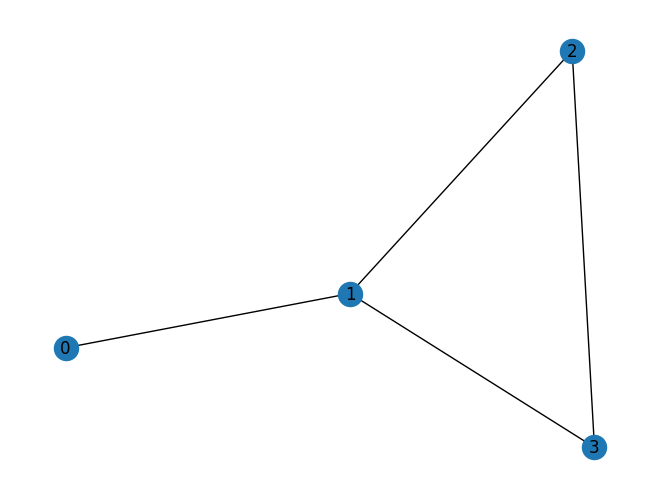

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (1,3)])

#Encontrar todos los puentes
print("Puentes en el grafo:", list(nx.bridges(G)))

#Verificar si el grafo tiene al menos un puente
print("¿Tiene puentes?", nx.has_bridges(G))
nx.draw(G, with_labels=True)

## Comunidades

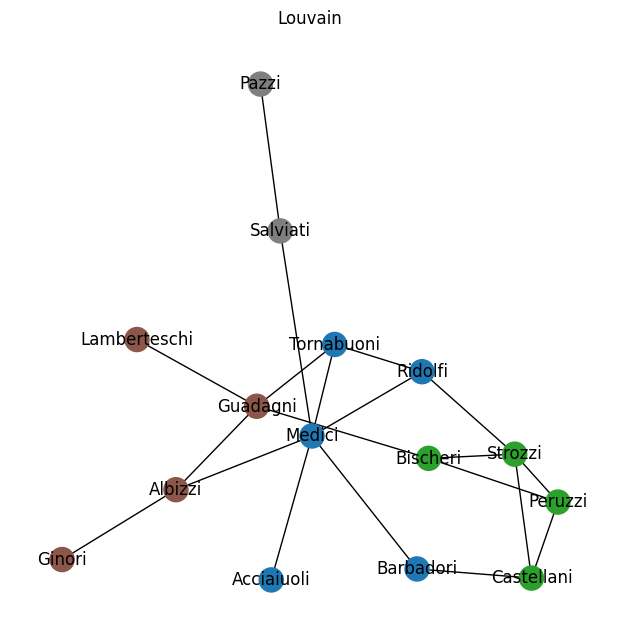

In [ ]:
#Louvain

import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import matplotlib.cm as cm

g = nx.florentine_families_graph()

# Louvain
louvain_partition = community_louvain.best_partition(g)

plt.figure(figsize=(6, 6))
num_coms = len(set(louvain_partition.values()))
colors_list = [cm.tab10(i/num_coms) for i in range(num_coms)]
node_colors = [colors_list[louvain_partition[n]] for n in g.nodes()]
nx.draw(g, with_labels=True, node_color=node_colors)
plt.title("Louvain")
plt.show()

| Método                | Cómo funciona                                                                                                                                          | Algo relevante                                                                                  |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **Louvain**           | Heurístico de **optimización de modularidad**. Primero cada nodo es su propia comunidad, luego se reubican buscando la máxima ganancia de modularidad. | Muy rápido y escalable a grafos grandes.             |
| **Kernighan–Lin**     | Particiona el grafo en **dos bloques**. Itera intercambiando nodos entre lados para minimizar el *edge cut*.                                           | Siempre da una **bipartición**. Puede usarse como paso inicial en divisiones más grandes.       |
| **Girvan–Newman**     | Elimina aristas con mayor **betweenness centrality**, rompiendo la red progresivamente.                                                                | Permite ver la estructura jerárquica en un **dendrograma**, pero es costoso computacionalmente. |
| **K-Clique**          | Busca comunidades como la unión de cliques de tamaño *k* que se conectan si comparten *k-1* nodos.                                                     | Muy sensible a la elección de *k*. Permite comunidades **solapadas**.                           |
| **Label Propagation** | Cada nodo adopta la etiqueta más frecuente entre sus vecinos, repitiendo hasta converger.                                                              | Es **muy rápido**, pero el resultado no es determinista.                                        |

## Componentes

In [ ]:
# Grafo no dirigido de ejemplo
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (3,4)])  #2 componentes: {0,1,2} y {3,4}

print("¿G es conexa?", "No" if nx.is_connected(G) == False else "Si")

#Número de componentes conexas
print("Número de componentes conexas:", nx.number_connected_components(G))

#¿Cuales son las componentes conexas?
print("Componentes conexas:", list(nx.connected_components(G)))

¿G es conexa? No
Número de componentes conexas: 2
Componentes conexas: [{0, 1, 2}, {3, 4}]


### Conexidad fuerte (redes dirigidas)

todos pueden alcanzarse mutuamente desde ambos sentidos de las aristas dirigidas.

¿DG está fuertemente conectado? False
Número de SCC: 3
Nodos del grafo condensado: [0, 1, 2]


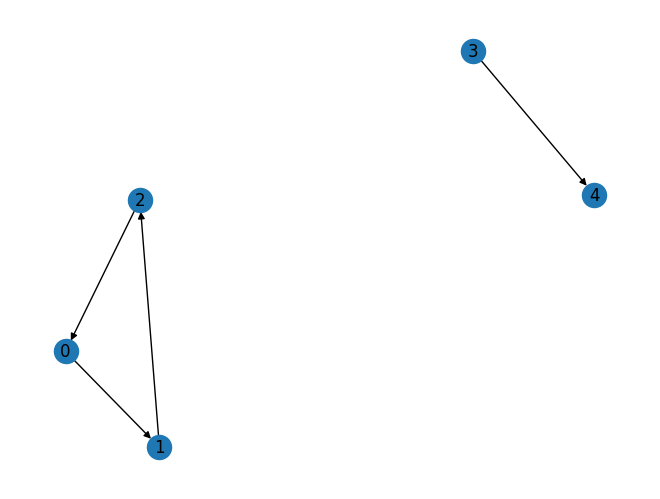

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([(0,1), (1,2), (2,0), (3,4)])

#¿Está fuertemente conectado?
print("¿DG está fuertemente conectado?", nx.is_strongly_connected(DG))

#Número de componentes fuertemente conectadas
print("Número de SCC:", nx.number_strongly_connected_components(DG))

#Cada SCC (Strongly Connected Component) se vuelve un nodo
cond = nx.condensation(DG)
print("Nodos del grafo condensado:", list(cond.nodes()))

nx.draw(DG, with_labels=True)

## Conexidad débil

In [ ]:
#¿Está débilmente conectada?
print("¿DG está débilmente conectado?", nx.is_weakly_connected(DG))

#Número de componentes débilmente conectadas
print("Número de componentes débilmente conectadas:", nx.number_weakly_connected_components(DG))

#Generador de componentes débilmente conectadas
print("Componentes débilmente conectadas:", list(nx.weakly_connected_components(DG)))

¿DG está débilmente conectado? False
Número de componentes débilmente conectadas: 2
Componentes débilmente conectadas: [{0, 1, 2}, {3, 4}]


### Nodos críticos
Si se eliminan las componentes conexas de la red aumenta

Nodos críticos: [1, 3]


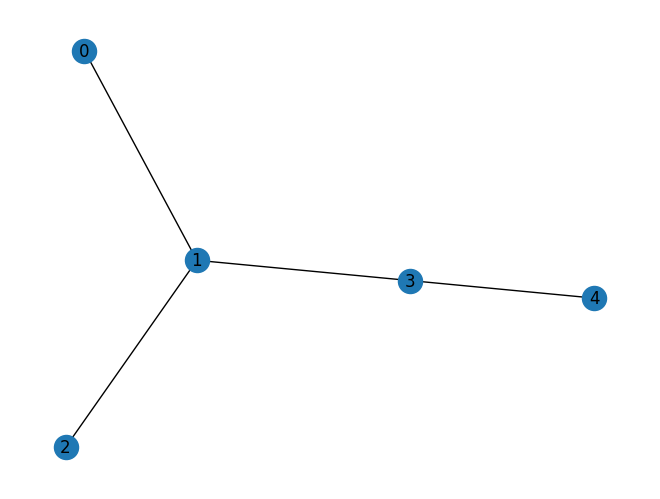

In [ ]:
G2 = nx.Graph()
G2.add_edges_from([(0,1),(1,2),(1,3),(3,4)])

# Encontrar nodos críticos
print("Nodos críticos:", list(nx.articulation_points(G2)))
nx.draw(G2, with_labels=True)

## Regularidad

¿G es regular? si


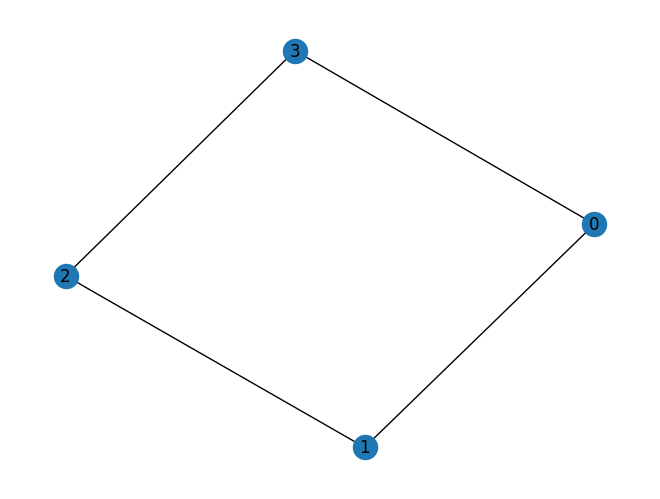

In [ ]:
G = nx.cycle_graph(4)
#Todos los nodos el mismo grado
print("¿G es regular?", "si" if nx.is_regular(G) else "no")
nx.draw(G, with_labels=True)

In [ ]:
#La red es k-regular si todos sus nodos tienen el mismo grado "k"
print("¿G es 2-regular?", "si" if nx.is_k_regular(G, 2) else "no")
print("¿G es 3-regular?","si" if nx.is_k_regular(G, 3) else "no")

¿G es 2-regular? si
¿G es 3-regular? no


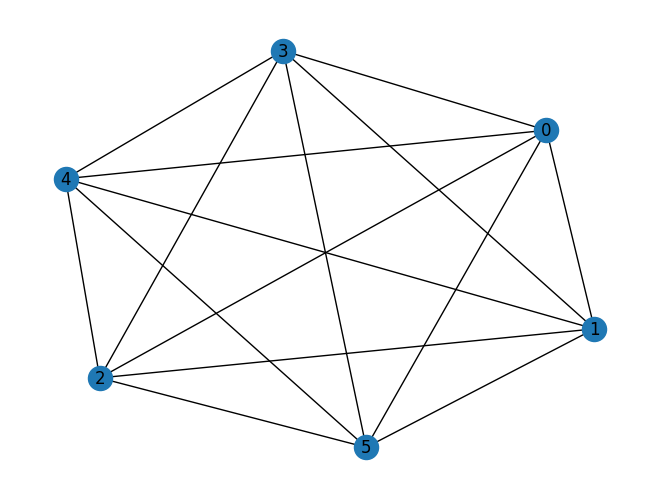

In [ ]:
H = nx.complete_graph(6)
nx.draw(H, with_labels=True)

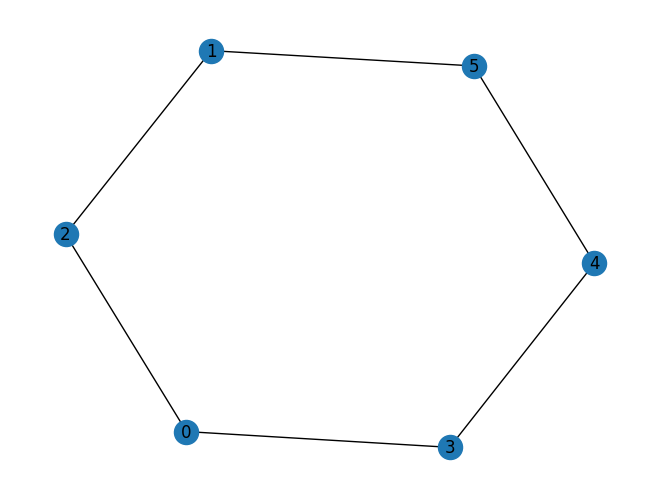

In [ ]:
#Subgráfica donde cada nodo tiene grado "k"
k_factor_subgraph = nx.k_factor(H, 2)
nx.draw(k_factor_subgraph, with_labels=True)

# [Funciones](https://networkx.org/documentation/stable/reference/functions.html)

## Funciones Generales

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

#Grado por nodo
print("Grado del nodo 2:", G.degree(2))

#Hacer una red dirigida
DG = G.to_directed()
print("Red dirigida:", list(DG.edges()))

#Pasar de red dirigida a no dirigida
UG = DG.to_undirected()
print("Red no dirigida:", list(UG.edges()))

Grado del nodo 2: 2
Red dirigida: [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)]
Red no dirigida: [(1, 2), (2, 3), (3, 4)]


## Nodos

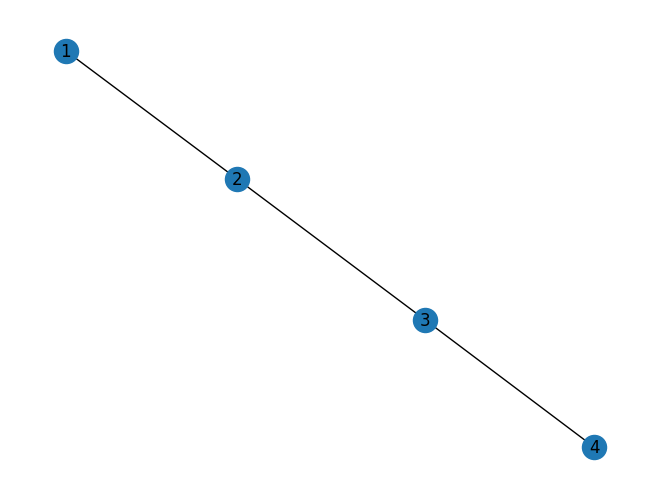

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
print("Nodos de una red:", list(G.nodes()))
print("Número de nodos:", G.number_of_nodes())
print("Vecinos de un nodo (2):", list(G.neighbors(2)))
print("Vecinos en común entre dos nodos (2 y 3):", list(nx.common_neighbors(G, 2, 3)))

Nodos de una red: [1, 2, 3, 4]
Número de nodos: 4
Vecinos de un nodo (2): [1, 3]
Vecinos en común entre dos nodos (2 y 3): []


## Aristas

In [ ]:
print("Aristas de una red:", list(G.edges()))

print("Número de aristas:", G.number_of_edges())

Aristas de una red: [(1, 2), (2, 3), (3, 4)]
Número de aristas: 3


## Atributos

In [ ]:
#Dar atributos a los nodos
nx.set_node_attributes(G, {1:"rojo", 2:"azul"}, "color")
print("Atributos de nodo 1:", G.nodes[1]["color"])

#Saber los atributos de todos los nodos de una red
print("Todos los colores:", nx.get_node_attributes(G, "color"))

#Dar atributos a las aristas
nx.set_edge_attributes(G, {(1,2):5, (2,3):3}, "peso")
print("Peso arista (1,2):", G[1][2]["peso"])  # → 5

#Saber los atributos de todas las aristas
print("Todos los pesos:", nx.get_edge_attributes(G, "peso"))

Atributos de nodo 1: rojo
Todos los colores: {1: 'rojo', 2: 'azul'}
Peso arista (1,2): 5
Todos los pesos: {(1, 2): 5, (2, 3): 3}


# [Generadores de Gráficas](https://networkx.org/documentation/stable/reference/generators.html#)

## Visibility Graph

In [ ]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#Precios de NVIDIA
df = yf.download("NVDA", start="2025-01-01", end="2025-02-02")
df.head()

/tmp/ipython-input-2102087627.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("NVDA", start="2025-01-01", end="2025-02-02")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-02,138.287674,138.857589,134.608275,135.978049,198247200
2025-01-03,144.446686,144.876609,139.707445,139.987399,229322500
2025-01-06,149.405869,152.135439,147.796143,148.566008,265377400
2025-01-07,140.117371,153.105279,139.987387,153.005289,351782200
2025-01-08,140.087387,143.926764,137.537796,142.556990,227349900


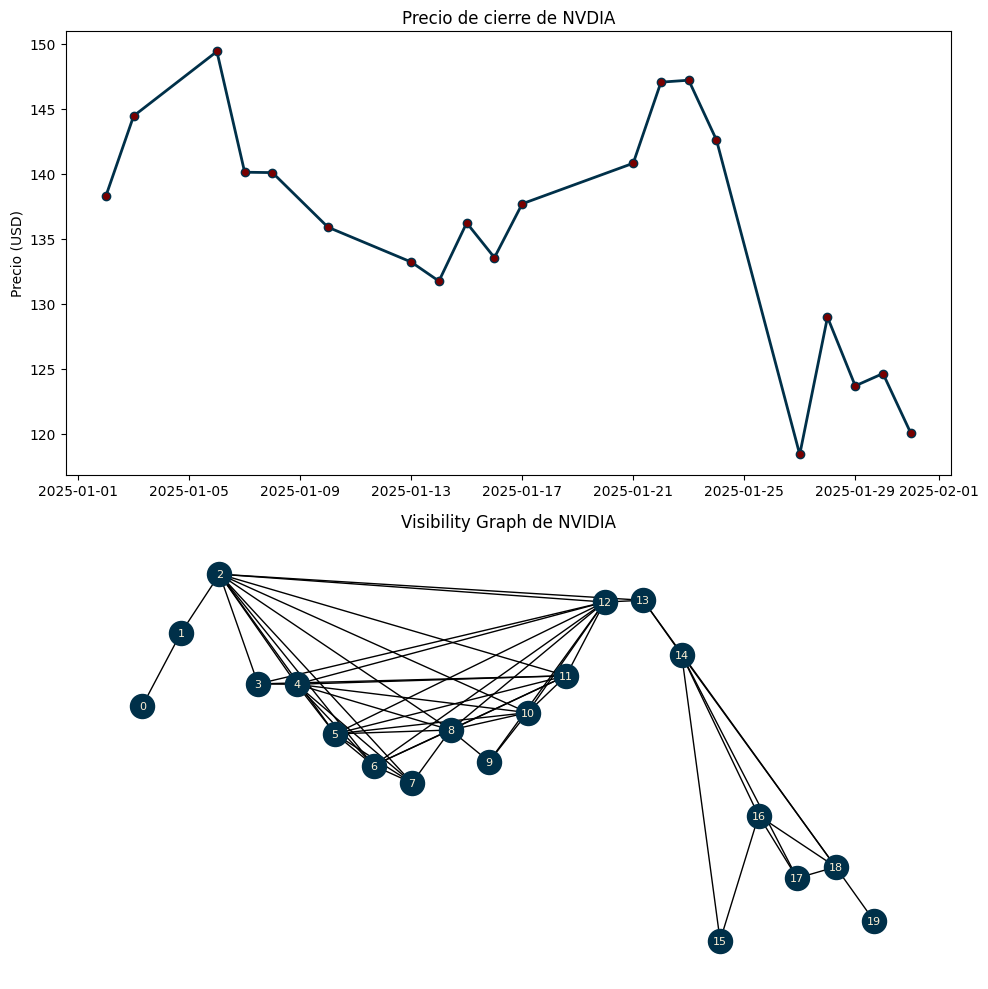

In [ ]:
#Series -> numpy (array) -> 1-dimension
time_series = df["Close"].to_numpy().flatten()

#Grafo de visibilidad
G = nx.visibility_graph(time_series)

for i, val in enumerate(time_series):
    G.nodes[i]["value"] = float(val) #Nodos con atributo 'value': precio dia i

#Visualizar
 #2 filas, 1 columna
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

  #Serie temporal
ax1.plot(
    df.index, time_series,
    marker='o',
    color="#003049",           # color de la línea
    markerfacecolor="#780000", # color del relleno del marker
    linewidth=2                # grosor de la línea
)
ax1.set_title("Precio de cierre de NVDIA")
ax1.set_ylabel("Precio (USD)")

  #Grafo de visibilidad
    #(Numero nodo, valor accion) -> (posición x,y)
pos = {i: (i, time_series[i]) for i in range(len(time_series))}
nx.draw(G, pos, ax=ax2, with_labels=True, node_size=300, font_size=8, node_color="#003049", font_color="#fdf0d5")
ax2.set_title("Visibility Graph de NVIDIA")

plt.tight_layout()
plt.show()

Pregunta: ¿Por qué solo hay 20 nodos?

# [Álgebra Lineal](https://networkx.org/documentation/stable/reference/linalg.html)

## Matriz de Adyacencia

In [ ]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])

# Matriz de adyacencia
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


## Matriz de incidencia

In [ ]:
#Cada entrada de la matriz indica si el nodo pertenece a la arista o no.
I = nx.incidence_matrix(G)
print(I.todense())
#[1,1,0,0] indica que la arista conecta nodos 0 y 1.

[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]


## Matriz Laplaciana

In [ ]:
#La diagonal es elgrado de cada nodo
#Fuera de diagonal: -1 si hay arista entre nodos, 0 si no
L = nx.laplacian_matrix(G)
print(L.todense())

[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]


# [Renombrar Nodos](https://networkx.org/documentation/stable/reference/relabel.html)

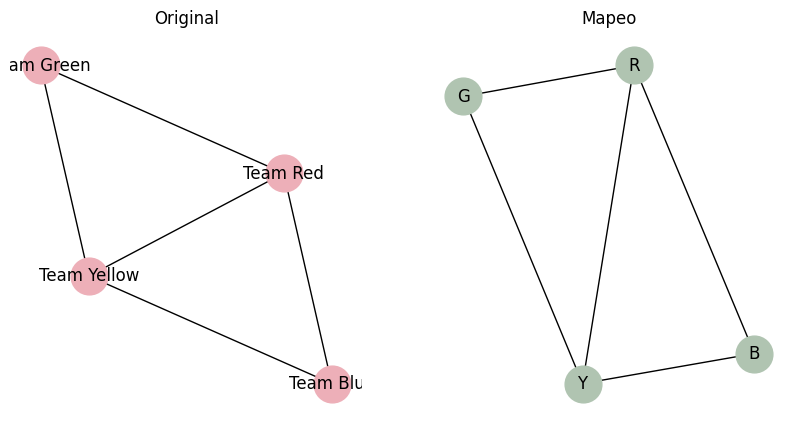

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    ("Team Red", "Team Blue"),
    ("Team Red", "Team Green"),
    ("Team Blue", "Team Yellow"),
    ("Team Green", "Team Yellow"),
    ("Team Yellow", "Team Red")
])

mapping = {
    "Team Red": "R",
    "Team Blue": "B",
    "Team Green": "G",
    "Team Yellow": "Y"
}

H = nx.relabel_nodes(G, mapping, copy=True)

# Dibujamos ambos grafos
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
nx.draw(G, with_labels=True, node_color='#edafb8', node_size=700)
plt.title("Original")

plt.subplot(1,2,2)
nx.draw(H, with_labels=True, node_color='#b0c4b1', node_size=700)
plt.title("Mapeo")

plt.show()

# [Dibujar (Layouts)](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)

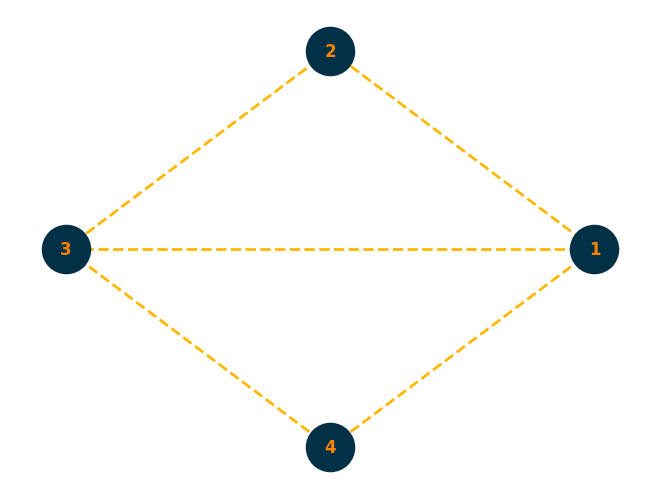

In [ ]:
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,3)])

pos = nx.circular_layout(G)

nx.draw(
    G,
    pos,                  #Layout / Distribución de los nodos en el dibujo
    with_labels=True,     #Etiquetas de los nodos
    node_size=1200,       #Tamaño del nodo
    node_color="#023047", #Color de los nodos
    font_size=12,         #Tamaño del nombre del nodo
    font_color="#fb8500", #Color del texto del nombre del nodo
    font_weight="bold",   #Nombre de nodos en negritas
    edge_color="#ffb703", #Color de los enlaces
    width=2,              #Grosor de los enlaces
    style="dashed"        #Estilo de los enlaces
)
plt.show()

| Layout                |Uso                                           |
|-----------------------|-------------------------------------------------------------------------|
| bipartite_layout       | Posiciona los nodos en dos conjuntos distintos. |
| circular_layout        | Distribuye los nodos en un círculo.                                      |
| kamada_kawai_layout    | Posiciona los nodos minimizando una función de energía basada en la distancia de los nodos (Recomiendo). |
| planar_layout          | Posiciona los nodos sin que se crucen las aristas (si es posible).       |
| random_layout          | Posiciona los nodos de forma aleatoria.                                   |
| shell_layout           | Posiciona los nodos en capas concéntricas (anillos).                |
| spring_layout          | Posiciona los nodos usando un modelo de fuerzas tipo resorte.            |
| spectral_layout        | Posiciona los nodos usando los vectores propios del laplaciano del grafo. |
| spiral_layout          | Posiciona los nodos siguiendo una espiral.                                |
